In [2]:
import numpy as np
import pandas as pd
import os 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
metadata = pd.read_csv("metadata.csv")
metadata = metadata.drop(['technology'], axis=1)

# Test

In [4]:
test_df = pd.read_hdf('./test_cite_inputs.h5', start= 0, stop = 1)
test_df = test_df.reset_index(level=0)
test_df = test_df['cell_id']
test_df = pd.merge(test_df, metadata, how='left',on='cell_id')

for i in range(70):
    train = pd.read_hdf('./test_cite_inputs.h5', start= 1024 * i + 1, stop=1024 * i + 1024)
    train = train.reset_index(level=0)
    train = train['cell_id']

    train = pd.merge(train, metadata, how='left',on='cell_id')

    test_df = pd.concat([test_df, train], ignore_index=True)

In [5]:
test_df['donor'] = test_df['donor'].apply(lambda x: 1 if x == 13176 else x)
test_df['donor'] = test_df['donor'].apply(lambda x: 2 if x == 27678 else x)
test_df['donor'] = test_df['donor'].apply(lambda x: 3 if x == 31800 else x)
test_df['donor'] = test_df['donor'].apply(lambda x: 4 if x == 32606 else x)

In [6]:
day = test_df.set_index("cell_id")[["day"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})

donor = test_df.set_index("cell_id")[["donor"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

cell_type = test_df.set_index("cell_id")[["cell_type"]].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

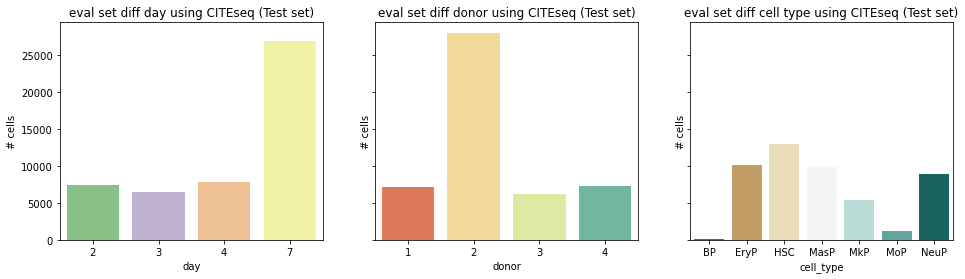

In [7]:
f, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True)
sns.barplot(x = "day", y="# cells", data = day, palette="Accent", ax = axs[0])
axs[0].set_title("eval set diff day using CITEseq (Test set)")
sns.barplot(x = "donor", y="# cells", data = donor, palette="Spectral", ax = axs[1])
axs[1].set_title("eval set diff donor using CITEseq (Test set)")
sns.barplot(x = "cell_type", y="# cells", data = cell_type, palette="BrBG", ax = axs[2])
axs[2].set_title("eval set diff cell type using CITEseq (Test set)")

f.savefig('./image/1.0.png')

In [8]:
day_cell_type = test_df.set_index("cell_id")[["day", 'cell_type']].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

day_cell_type_2 = day_cell_type[day_cell_type['day'] == 2]
day_cell_type_3= day_cell_type[day_cell_type['day'] == 3]
day_cell_type_4 = day_cell_type[day_cell_type['day'] == 4]
day_cell_type_7 = day_cell_type[day_cell_type['day'] == 7]

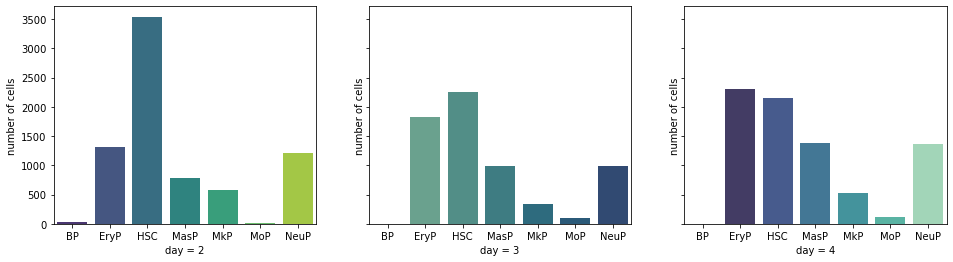

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
sns.barplot(x=day_cell_type_2['cell_type'], y=day_cell_type_2['# cells'], palette="viridis", ax=ax1)
ax1.set_xlabel("day = 2")
ax1.set_ylabel("number of cells")

sns.barplot(x=day_cell_type_3['cell_type'], y=day_cell_type_3['# cells'], palette="crest", ax=ax2)
ax2.set_xlabel("day = 3")
ax2.set_ylabel("number of cells")

sns.barplot(x=day_cell_type_4['cell_type'], y=day_cell_type_4['# cells'], palette="mako", ax=ax3)
ax3.set_xlabel("day = 4")
ax3.set_ylabel("number of cells")

f.savefig('./image/2.0.0.png')

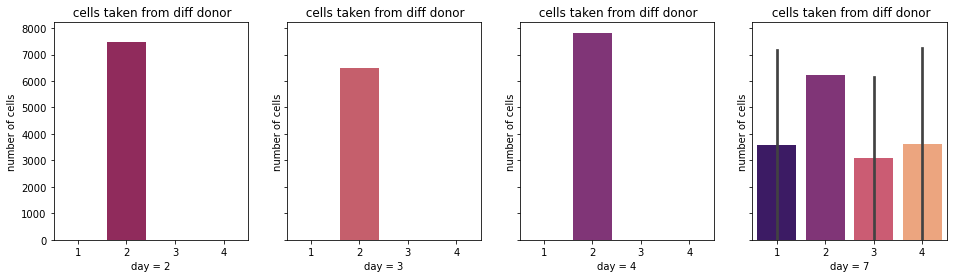

In [10]:
day_donor = test_df.set_index("cell_id")[["day", 'donor']].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

day_donor_2 = day_donor[day_donor['day'] == 2]
day_donor_3 = day_donor[day_donor['day'] == 3]
day_donor_4 = day_donor[day_donor['day'] == 4]
day_donor_7 = day_donor[day_donor['day'] == 7]
df_empty_2 = pd.DataFrame({'day': [2, 3, 4],
                    'donor' : [1, 3, 4],
                    '# cells' : [0 , 0, 0]})

day_donor_2 = pd.concat([day_donor_2, df_empty_2], ignore_index = True, axis = 0)
day_donor_3 = pd.concat([day_donor_3, df_empty_2], ignore_index = True, axis = 0)
day_donor_4 = pd.concat([day_donor_4, df_empty_2], ignore_index = True, axis = 0)
day_donor_7 = pd.concat([day_donor_7, df_empty_2], ignore_index = True, axis = 0)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
sns.barplot(x=day_donor_2['donor'], y=day_donor_2['# cells'], palette="rocket", ax=ax1)
ax1.set_xlabel("day = 2")
ax1.set_ylabel("number of cells")
ax1.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_3['donor'], y=day_donor_3['# cells'], palette="flare", ax=ax2)
ax2.set_xlabel("day = 3")
ax2.set_ylabel("number of cells")
ax2.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_4['donor'], y=day_donor_4['# cells'], palette="magma", ax=ax3)
ax3.set_xlabel("day = 4")
ax3.set_ylabel("number of cells")
ax3.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_7['donor'], y=day_donor_7['# cells'], palette="magma", ax=ax4)
ax4.set_xlabel("day = 7")
ax4.set_ylabel("number of cells")
ax4.set_title(" cells taken from diff donor")
f.savefig('./image/2.0.1.png')


In [11]:
donor_cell_type = test_df.set_index("cell_id")[["donor", 'cell_type']].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

In [12]:
donor_cell_type_1 = donor_cell_type[donor_cell_type['donor'] == 1]
donor_cell_type_2 = donor_cell_type[donor_cell_type['donor'] == 2]
donor_cell_type_3 = donor_cell_type[donor_cell_type['donor'] == 3]
donor_cell_type_4 = donor_cell_type[donor_cell_type['donor'] == 4]

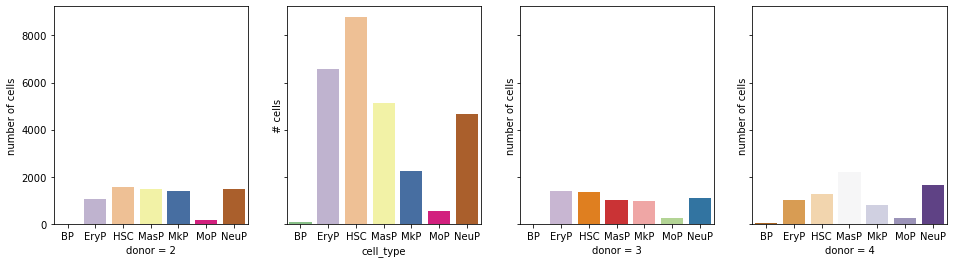

In [13]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
sns.barplot(x=donor_cell_type_1['cell_type'], y=donor_cell_type_1['# cells'], palette='Accent', ax=ax1)
ax1.set_xlabel("donor = 1")
ax1.set_ylabel("number of cells")

sns.barplot(x=donor_cell_type_2['cell_type'], y=donor_cell_type_2['# cells'], palette='Accent', ax=ax2)
ax1.set_xlabel("donor = 2")
ax1.set_ylabel("number of cells")

sns.barplot(x=donor_cell_type_3['cell_type'], y=donor_cell_type_3['# cells'], palette="Paired_r", ax=ax3)
ax3.set_xlabel("donor = 3")
ax3.set_ylabel("number of cells")

sns.barplot(x=donor_cell_type_4['cell_type'], y=donor_cell_type_4['# cells'], palette="PuOr", ax=ax4)
ax4.set_xlabel("donor = 4")
ax4.set_ylabel("number of cells")

f.savefig('./image/2.3.0.png')

# Train

In [14]:
train_df = pd.read_hdf('./train_cite_inputs.h5', start= 0, stop = 1)
train_df = train_df.reset_index(level=0)
train_df = train_df['cell_id']
train_df = pd.merge(train_df, metadata, how='left',on='cell_id')

for i in range(70):
    train = pd.read_hdf('./train_cite_inputs.h5', start= 1024 * i + 1, stop=1024 * i + 1024)
    train = train.reset_index(level=0)
    train = train['cell_id']

    train = pd.merge(train, metadata, how='left',on='cell_id')

    train_df = pd.concat([train_df, train], ignore_index=True)



In [15]:
train_df['donor'] = train_df['donor'].apply(lambda x: 1 if x == 13176 else x)
train_df['donor'] = train_df['donor'].apply(lambda x: 2 if x == 27678 else x)
train_df['donor'] = train_df['donor'].apply(lambda x: 3 if x == 31800 else x)
train_df['donor'] = train_df['donor'].apply(lambda x: 4 if x == 32606 else x)

In [16]:
day = train_df.set_index("cell_id")[["day"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})

donor = train_df.set_index("cell_id")[["donor"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

cell_type = train_df.set_index("cell_id")[["cell_type"]].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

In [25]:

df_empty_1 = pd.DataFrame({'day': [7],
                    '# cells' : [0 ]})
day = pd.concat([day, df_empty_1], ignore_index = True, axis = 0)

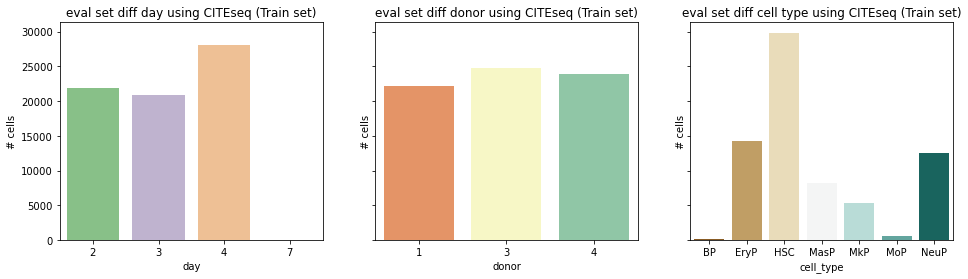

In [26]:
f, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True)
sns.barplot(x = "day", y="# cells", data = day, palette="Accent", ax = axs[0])
axs[0].set_title("eval set diff day using CITEseq (Train set)")
sns.barplot(x = "donor", y="# cells", data = donor, palette="Spectral", ax = axs[1])
axs[1].set_title("eval set diff donor using CITEseq (Train set)")
sns.barplot(x = "cell_type", y="# cells", data = cell_type, palette="BrBG", ax = axs[2])
axs[2].set_title("eval set diff cell type using CITEseq (Train set)")

f.savefig('./image/1.1.png')

In [28]:
day_cell_type = train_df.set_index("cell_id")[["day", 'cell_type']].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

day_cell_type_2 = day_cell_type[day_cell_type['day'] == 2]
day_cell_type_3= day_cell_type[day_cell_type['day'] == 3]
day_cell_type_4 = day_cell_type[day_cell_type['day'] == 4]
day_cell_type_7 = day_cell_type[day_cell_type['day'] == 7]

In [30]:
day_cell_type_7

,day,cell_type,# cells


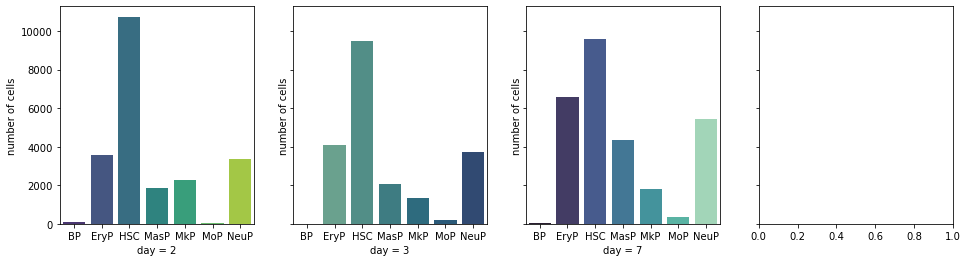

In [32]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
sns.barplot(x=day_cell_type_2['cell_type'], y=day_cell_type_2['# cells'], palette="viridis", ax=ax1)
ax1.set_xlabel("day = 2")
ax1.set_ylabel("number of cells")

sns.barplot(x=day_cell_type_3['cell_type'], y=day_cell_type_3['# cells'], palette="crest", ax=ax2)
ax2.set_xlabel("day = 3")
ax2.set_ylabel("number of cells")

sns.barplot(x=day_cell_type_4['cell_type'], y=day_cell_type_4['# cells'], palette="mako", ax=ax3)
ax3.set_xlabel("day = 4")
ax3.set_ylabel("number of cells")

ax3.set_xlabel("day = 7")
ax3.set_ylabel("number of cells")

f.savefig('./image/2.1.0.png')

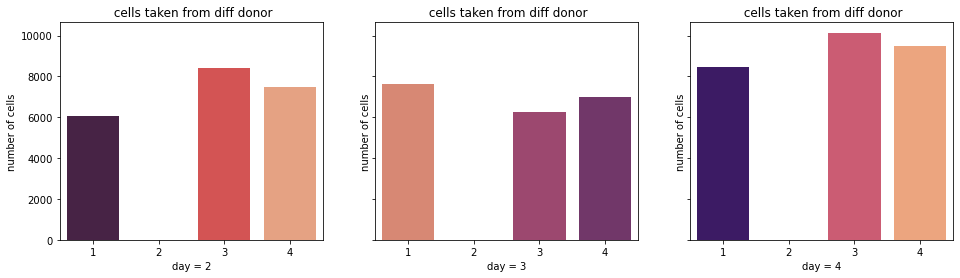

In [21]:
day_donor = train_df.set_index("cell_id")[["day", 'donor']].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

day_donor_2 = day_donor[day_donor['day'] == 2]
day_donor_3 = day_donor[day_donor['day'] == 3]
day_donor_4 = day_donor[day_donor['day'] == 4]
day_donor_7 = day_donor[day_donor['day'] == 7]
df_empty_2 = pd.DataFrame({'day': [2, 3, 4],
                    'donor' : [2, 2, 2],
                    '# cells' : [0 , 0, 0]})

day_donor_2 = pd.concat([day_donor_2, df_empty_2], ignore_index = True, axis = 0)
day_donor_3 = pd.concat([day_donor_3, df_empty_2], ignore_index = True, axis = 0)
day_donor_4 = pd.concat([day_donor_4, df_empty_2], ignore_index = True, axis = 0)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
sns.barplot(x=day_donor_2['donor'], y=day_donor_2['# cells'], palette="rocket", ax=ax1)
ax1.set_xlabel("day = 2")
ax1.set_ylabel("number of cells")
ax1.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_3['donor'], y=day_donor_3['# cells'], palette="flare", ax=ax2)
ax2.set_xlabel("day = 3")
ax2.set_ylabel("number of cells")
ax2.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_4['donor'], y=day_donor_4['# cells'], palette="magma", ax=ax3)
ax3.set_xlabel("day = 4")
ax3.set_ylabel("number of cells")
ax3.set_title(" cells taken from diff donor")
f.savefig('./image/2.1.1.png')


In [22]:
donor_cell_type = train_df.set_index("cell_id")[["donor", 'cell_type']].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

In [23]:
donor_cell_type_1 = donor_cell_type[donor_cell_type['donor'] == 1]
donor_cell_type_2 = donor_cell_type[donor_cell_type['donor'] == 2]
donor_cell_type_3 = donor_cell_type[donor_cell_type['donor'] == 3]
donor_cell_type_4 = donor_cell_type[donor_cell_type['donor'] == 4]

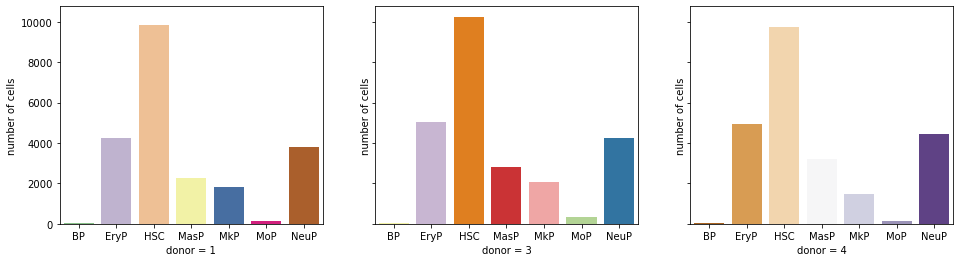

In [24]:
f, (ax1, ax3, ax4) = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
sns.barplot(x=donor_cell_type_1['cell_type'], y=donor_cell_type_1['# cells'], palette='Accent', ax=ax1)
ax1.set_xlabel("donor = 1")
ax1.set_ylabel("number of cells")

sns.barplot(x=donor_cell_type_3['cell_type'], y=donor_cell_type_3['# cells'], palette="Paired_r", ax=ax3)
ax3.set_xlabel("donor = 3")
ax3.set_ylabel("number of cells")

sns.barplot(x=donor_cell_type_4['cell_type'], y=donor_cell_type_4['# cells'], palette="PuOr", ax=ax4)
ax4.set_xlabel("donor = 4")
ax4.set_ylabel("number of cells")

f.savefig('./image/2.2.0.png')